In [85]:
import numpy as np
import matplotlib.pyplot as plt

Segment Construction

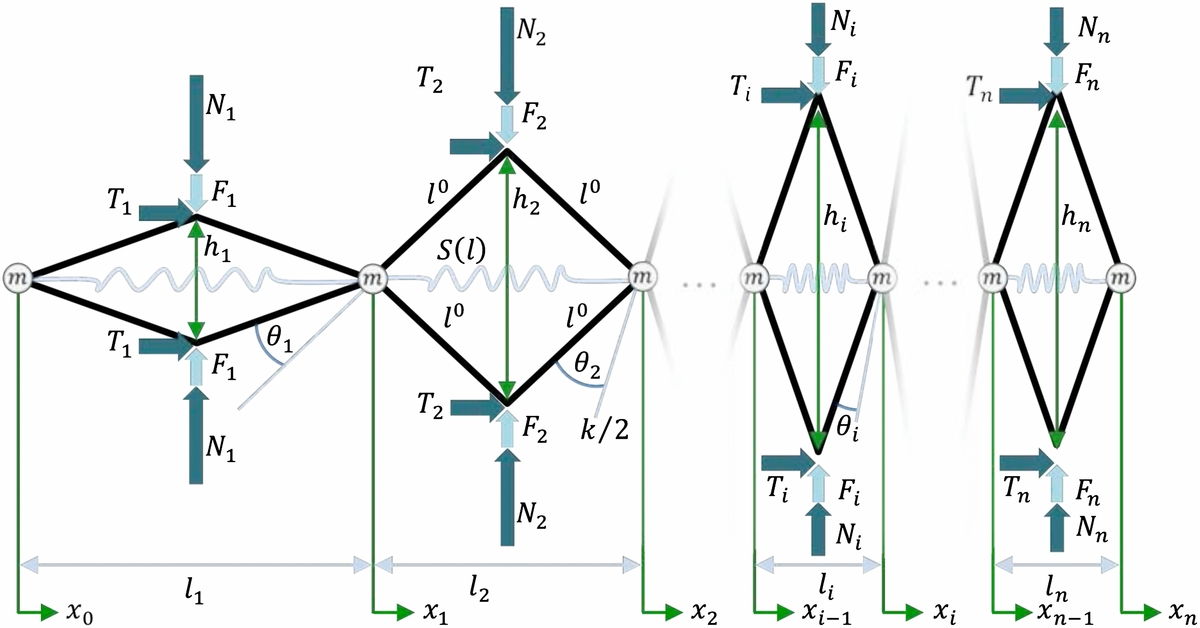

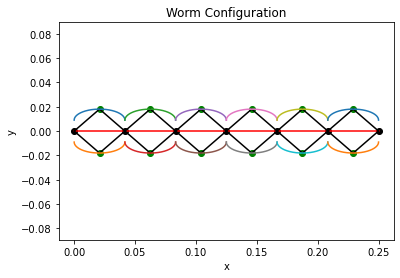

In [ ]:
def create_worm_model(length, n):
	deltaL = length / (n) # Discrete length  = reference length / number of segments

	# Geometry
	dt = np.dtype([
		("p1", "f8", (2,)),
		("p2", "f8", (2,)),
		("k",  "f8")
	])
	
	# Nodes
	nodes = np.zeros((n + 1, 2)) 
	nodes[0] = [0.0, 0.0] # fixed end at origin
	for i in range(1,n+1):
		nodes[i, 0] = i * deltaL # x-coordinate
		nodes[i, 1] = 0.0 # y-coordinate
			# Geometric parameters

	# Springs
	k_s = 1e4 # spring constant
	springs = np.zeros(n, dtype=dt)
	for i in range(n):
		springs["p1"][i] = nodes[i]
		springs["p2"][i] = nodes[i + 1]
		springs["k"][i]  = k_s  
			
	# Links and connectors
	connectors = np.zeros((n*2, 2))
	links = np.zeros(n*4, dtype=dt)
	k_l = 1e4 # link spring constant
	for i in range(n):
		x_pos = (nodes[i][0] + nodes[i + 1][0]) / 2
		y_pos = np.sqrt( ( (deltaL/2)**2 ) - ( (deltaL/4)**2 ) )

		n1 = nodes[i]
		n2 = nodes[i + 1]
		top_connector = [x_pos, y_pos]
		bottom_connector = [x_pos, -y_pos]
						
		connectors[2*i] = top_connector
		connectors[2*i + 1] = bottom_connector
		
		links[4*i] = (n1, top_connector, k_l)
		links[4*i + 1] = (top_connector, n2, k_l)
		links[4*i + 2] = (n1, bottom_connector, k_l)
		links[4*i + 3] = (bottom_connector, n2, k_l)

	plot_rod(nodes.flatten(), springs.flatten(), links.flatten(), connectors.flatten())
	return nodes, springs, links, connectors

worm = create_worm_model(length = 0.25, n = 6)

In [87]:
def plot_rod(q, s, l, c):

	# -------------------
	# Nodes
	q_x = q[::2]  # x-coordinates
	q_y = q[1::2] # y-coordinates

	# Connectors
	c_x = c[::2]
	c_y = c[1::2]

	# Springs: extract endpoints from structured array/list
	s_lines = np.array([[s[i][0], s[i][1]] for i in range(len(s))])  # shape (n_springs, 2, 2)
	s_x = s_lines[:, :, 0]  # [ [x1,x2], ... ]
	s_y = s_lines[:, :, 1]  # [ [y1,y2], ... ]

	# Links: same as springs
	l_lines = np.array([[l[i][0], l[i][1]] for i in range(len(l))])
	l_x = l_lines[:, :, 0]
	l_y = l_lines[:, :, 1]
	
	h1 = plt.figure(1)
	plt.clf()  # clear current figure
	plt.plot(q_x, q_y, 'o', color='black') 	# Plot nodes
	plt.plot(c_x, c_y, 'o', color='green') 	# Plot connectors
	for i in range(len(s)):
			plt.plot(s_x[i], s_y[i], '-', color='red') 	# Plot springs
	for i in range(len(l)):
			plt.plot(l_x[i], l_y[i], '-', color='black') 	# Plot links
	# -------------------

	# Worm Profile
	for i in range(len(q_x)-1):
		# top half-ellipse
		a = ( q_x[i] - q_x[i+1] ) / 2
		b = (c_y[2*i] - q_y[i]	) / 2 
		h, k =  (q_x[i+1] + q_x[i]) / 2,  (c_y[2*i] + q_y[i]) / 2
		theta = np.linspace(0, np.pi, 300)
		x = h + a * np.cos(theta)
		y = k + b * np.sin(theta)
		plt.plot(x,y)

		# bottom half-ellipse
		a = ( q_x[i] - q_x[i+1] ) / 2
		b = (q_y[i] - c_y[2*i + 1]) / 2 
		h, k =  (q_x[i+1] + q_x[i]) / 2,  (c_y[2*i + 1] + q_y[i]) / 2
		theta = np.linspace(np.pi, 2*np.pi, 300)
		x = h + a * np.cos(theta)
		y = k + b * np.sin(theta)
		plt.plot(x,y)
		
	plt.title('Worm Configuration')
	plt.xlabel('x')
	plt.ylabel('y')
	plt.axis('equal')
	plt.show()
